In [1]:
using Plots
using Random
using Distributions
using LinearAlgebra
using Dates
using LaTeXStrings
using BenchmarkTools
using MAT
using Statistics

[ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]


In [15]:

Δr=vcat(rs,rs[1,:]')##Trayectoria
D=abs.(diff(Δr,dims=1));
Ds=norm(sum(D,dims=1));


#Dss=zeros(n)
Dss=Ds
Data_ty=Dict();
Data_ty[1]=rs;
Ds
#####Ordenar el vector 

norms = [norm(row) for row in eachrow(rs)];
indices=sortperm(norms);
Rs=rs[indices,:];
DR,ΔR=dista(Rs)
DR
Dss=Ds
if DR<Ds
    Data_ty[1]=Rs;
    Data_ty[2]=ΔR;
    Dss=DR
end;
print("DS=",Ds)
print("  DR=",DR)

DS=1130.5096195964013  DR=833.1170385966188

## Importar datos

In [2]:
data = matread("C:\\Users\\Arif\\Downloads\\datat5.mat")
rs=hcat(data["x"],data["y"],data["y"].*0)
N=length(rs[:,1])

150

### Numero de veces a correr el recocido simulado N
$$N=100$$

In [20]:
NN=100
m=zeros(NN,2);

In [21]:
bp=Dict()
bp[1]=dista(rs)[1]


7637.891502298925

In [22]:
initial_temperature = 100.0
cooling_factor = 0.995
max_iterations = 2000

for i in 1:NN
    best_distance, best_path ,time= simulated_annealing_optimized(rs, initial_temperature, cooling_factor, max_iterations)
    m[i,:]=[best_distance , time ]'
    if best_distance<bp[1]
        bp[1]=best_distance
        bp[2]=best_path
    end
    
end
#println("Shortest path:", best_path)
#println("Shortest distance:", best_distance)
#println("Time ", time)

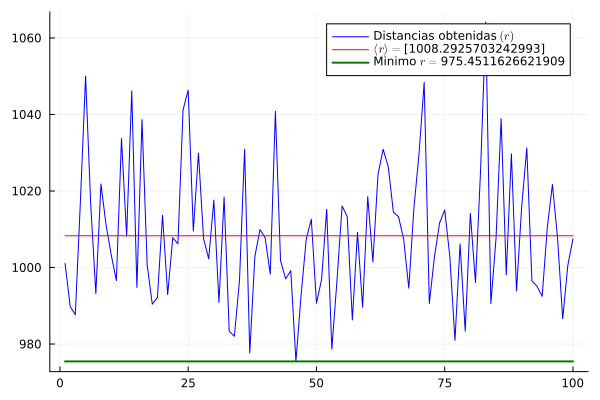

In [57]:
plot(m[:,1],color="blue",label="Distancias obtenidas "*L"(r)")
plot!(ones(NN).*mean(m[:,1],dims=1),color="red",label=L"\langle r \rangle="*string(mean(m[:,1],dims=1)))
plot!(ones(NN).*bp[1],label="Minimo "*L" r="*string(bp[1]),color="green",lw=2)


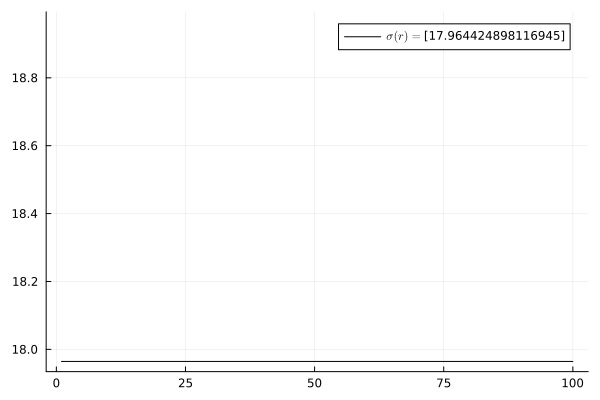

In [31]:
plot(ones(NN).*std(m[:,1],dims=1),color="black",label=L"\sigma(r)="*string(std(m[:,1],dims=1)))

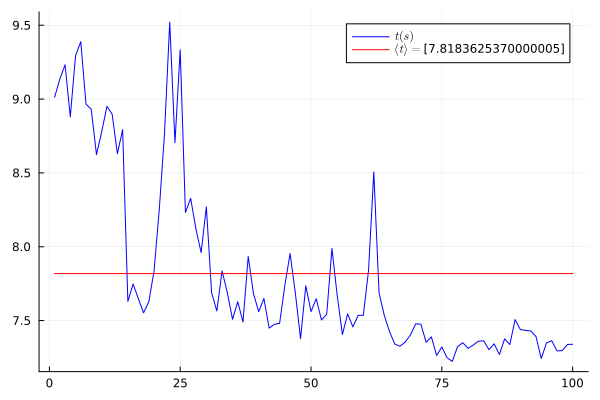

In [42]:
plot(m[:,2],color="blue",label=L" t(s)")
plot!(ones(NN).*mean(m[:,2],dims=1),color="red",label=L"\langle t \rangle="*string(mean(m[:,2],dims=1)))


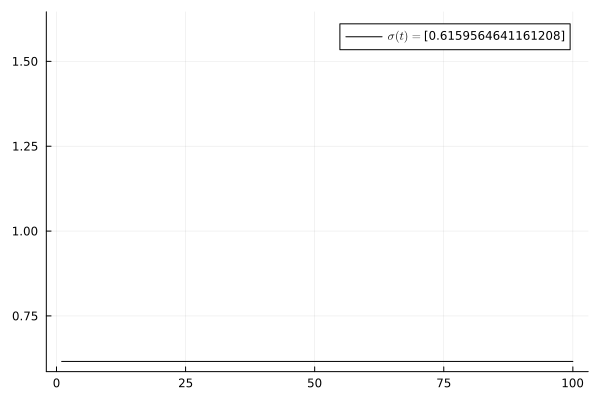

In [34]:
plot(ones(NN).*std(m[:,2],dims=1),color="black",label=L"\sigma(t)="*string(std(m[:,2],dims=1)))

## promedios y desviacion estandar

In [36]:
println(mean(m,dims=1))
println(std(m,dims=1))

[1008.2925703242993 7.8183625370000005]
[17.964424898116945 0.6159564641161208]


# Recocido

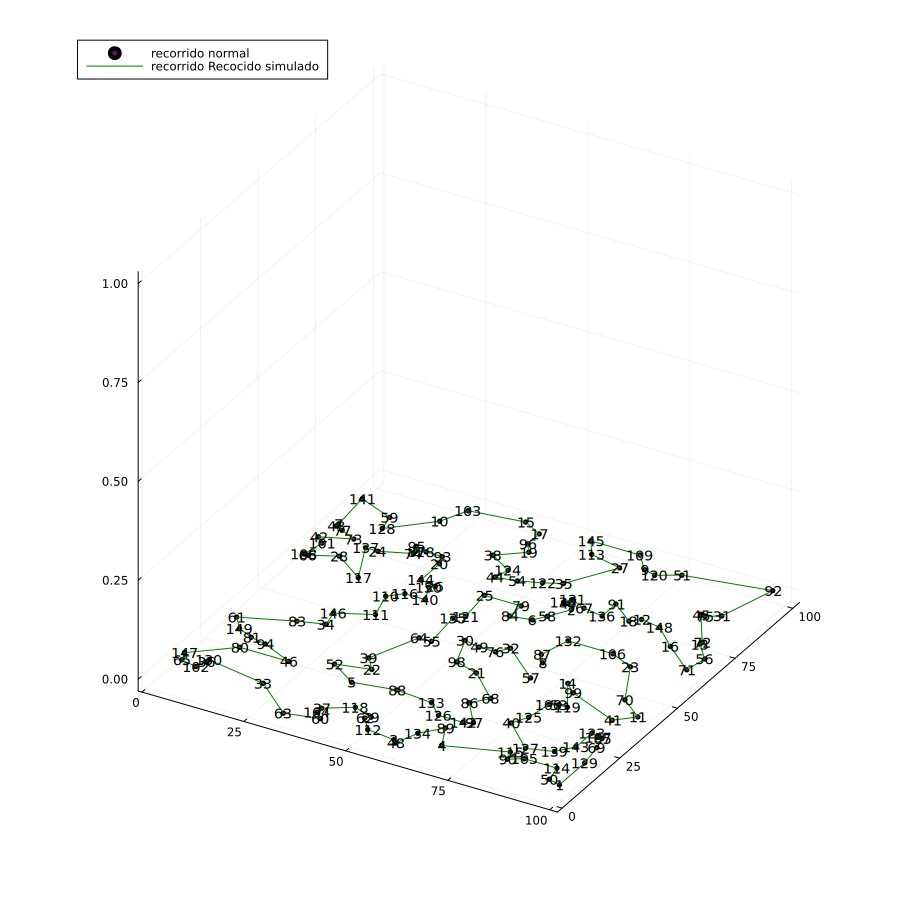

In [96]:
pp=plot(size=(900, 900))
scatter!(rs[bp[2],1],rs[bp[2],2],rs[bp[2],3],color=:rainbow,label="recorrido normal",markersize=2)

for i in 1:N
    annotate!([(rs[bp[2],1][i],rs[bp[2],2][i],rs[bp[2],3][i], text(bp[2][i], :up, 10))])
end

plot!(rs[bp[2],1],rs[bp[2],2],rs[bp[2],3],color="green",label="recorrido Recocido simulado")
display(pp)

In [73]:
i=1
rs[bp[2], 1][i]

70.0

In [60]:
rs[bp[2],1]

150-element Vector{Float64}:
 70.0
 68.0
 70.0
 81.0
 87.0
 93.0
 99.0
 95.0
 82.0
 79.0
 84.0
 82.0
 80.0
  ⋮
 62.0
 68.0
 70.0
 65.0
 68.0
 60.0
 54.0
 51.0
 55.0
 59.0
 61.0
 71.0

### Animación

[ Info: Saved animation to C:\Users\Arif\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\Estocasticos\Tarea\servando\Torneo\Optimizacion2d.gif


Plots.AnimatedGif("C:\\Users\\Arif\\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\\Estocasticos\\Tarea\\servando\\Torneo\\Optimizacion2d.gif")
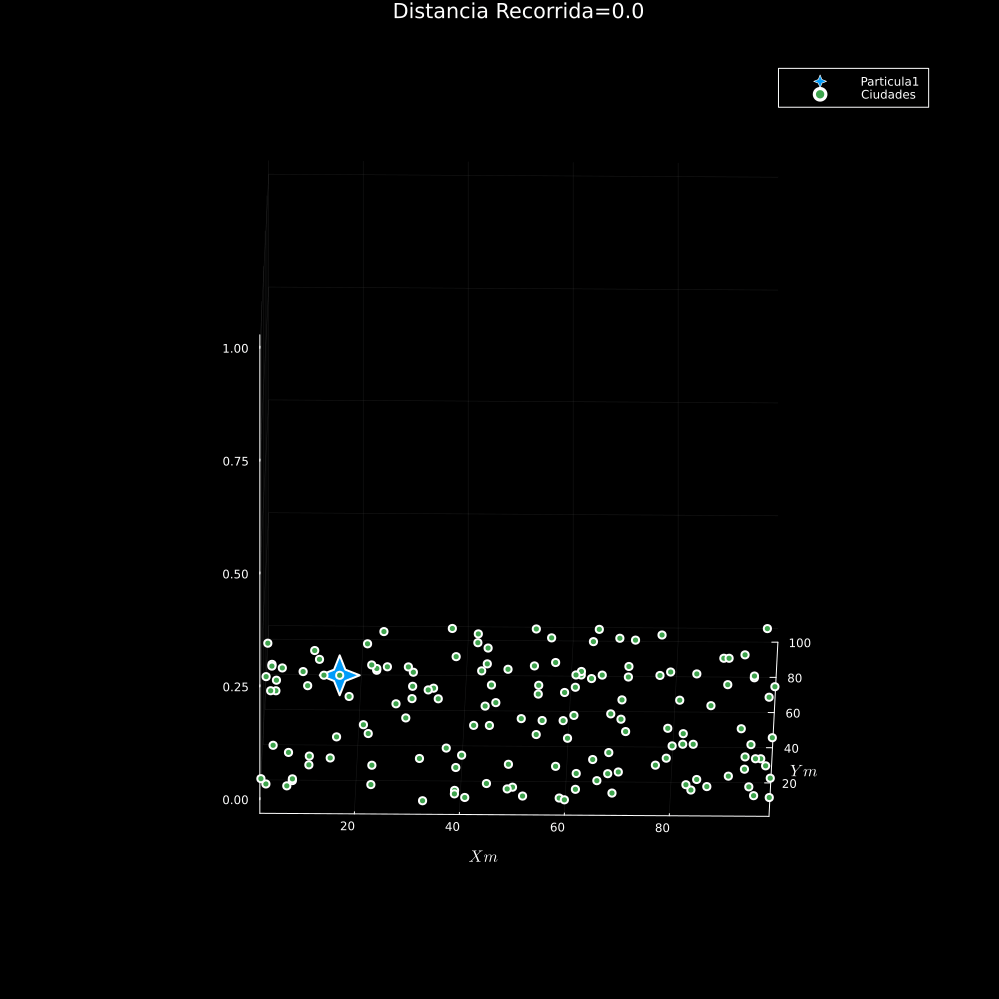

In [150]:
animac(rs[best_path,1]',rs[best_path,2]',rs[best_path,3]',1,"Optimizacion2d")

In [10]:
function animac(xs,ys,zs,N,titulo)
    n=length(xs)
    anim2d=@animate for i in 1:1:n;
        gr(size=(1000,1000))
        a=1
        j=1
        if i>1
            j=Int(ceil(i*0.3))
            a=range(0,1,length=(i-j+1))
            
        end 
        for d in 1:N
            if d==1
                Plots.plot(xs[d,j:i],ys[d,j:i],zs[d,j:i],color=d,lw=2,label="",xlabel=L"X m",ylabel=L"Y m",bgcolor="black",alpha=a,xlim = [minimum(xs), maximum(xs)],ylim = [minimum(ys), maximum(ys)],aspect_ratio=:equal);
                Plots.scatter!([xs[d,i]],[ys[d,i]],[zs[d,i]], color = d,markersize = 20,label="Particula"*string(d),markershape=:star4,camera = (i, 20));
                title!("Distancia Recorrida="*string(round(dista(hcat(xs',ys',zs')[1:i,:])[1],digits=3)))
                #Plots.scatter!([xs[d,i]],[ys[d,i]],[zs[d,i]], color = d,label="Distancia Recorrida="*string(dista(Data_ty[1][1:i,:])[1]));
            else
                Plots.plot!(xs[d,j:i],ys[d,j:i],zs[d,j:i],color=d,lw=2,label="",xlabel=L"X",ylabel=L"Y ",bgcolor="black",alpha=a,xlim = [minimum(xs), maximum(xs)],ylim = [minimum(ys), maximum(ys)],aspect_ratio=:equal,camera = (i, 20));
                Plots.scatter!([xs[d,i]],[ys[d,i]],[zs[d,i]], color = d,markersize = 20,label="Particula"*string(d));
                #title!("Distancia Recorrida="*string(dista(hcat(xs,ys,zs)[1:i,:])[1]))
                #Plots.scatter!([xs[i]],[ys[i]],[zs[i]], color = 1,label="Distancia Recorrida="*string(dista(hcat(xs,ys,zs)[1:i,:])[1]));
            end
        end
        scatter!(rs[:,1],rs[:,2],rs[:,3],label="Ciudades")
        
    end;
    gif(anim2d,titulo*".gif",fps=24);
    #anim = Animation(anim2d)
    #Animation.save(titulo * ".mp4", anim, fps = 24)
    
    
end

animac (generic function with 1 method)

In [5]:
function dista(rs)
    Δr = vcat(rs, rs[1, :]')  # Trayectoria
    D = diff(Δr, dims=1)
    Ds = sum(norm.(eachrow(D)))
    return Ds, Δr
end


dista (generic function with 1 method)

In [4]:
function simulated_annealing_optimized(rs, initial_temperature, cooling_factor, max_iterations)
    N = size(rs, 1)
    result = @timed begin
    # Define distance function
    function distance(city1, city2)
        return norm(city1 - city2)
    end
    
    # Define total distance function
    function total_distance(path)
        total = 0.0
        for i in 1:N-1
            total += distance(rs[path[i], :], rs[path[i+1], :])
        end
        total += distance(rs[path[N], :], rs[path[1], :])  # Return to the starting city
        return total
    end
    
    best_path = randperm(N)
    best_distance = total_distance(best_path)
    
    current_path = copy(best_path)
    current_distance = best_distance
    
    temperature = initial_temperature
    
    for iteration in 1:max_iterations
        for _ in 1:N
            # Generate a neighboring path by reversing a segment of the current path
            i, j = sort(sample(1:N, 2, replace=false))
            neighbor_path = copy(current_path)
            neighbor_path[i:j] = reverse(neighbor_path[i:j])
            
            # Calculate distances
            neighbor_distance = total_distance(neighbor_path)
            delta_distance = neighbor_distance - current_distance
            
            # Decide whether to accept the new path
            if delta_distance < 0 || rand() < exp(-delta_distance / temperature)
                current_path = copy(neighbor_path)
                current_distance = neighbor_distance
                
                # Update the best path if necessary
                if current_distance < best_distance
                    best_path = copy(current_path)
                    best_distance = current_distance
                end
            end
        end
        
        # Cool down the temperature
        temperature *= cooling_factor
    end
end
     
    return best_distance, best_path,result.time
end



simulated_annealing_optimized (generic function with 1 method)